# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0) #데이터 나누기

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler #스케일러 
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"] #인덱스를 다시 순서대로 맞춰주기
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) #X_train 데이터의 값들을 스케일링 진행해주기
X_train["bias"] = bias_train #X_train의 'bias'에 원래 'bais'열 넣어주기
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"] #X_test도 마찬가지로 train과 같이 해주기
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) #스케일 진행
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0]) #데이터의 파라미터 개수를 N에 대입

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)]) #초기 파라미터 숫자들을 임의로 랜덤하게 뽑아서 넣어주기
random_parameters = parameters.copy()
parameters

array([0.96086738, 0.46630589, 0.0703372 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [ ]:
def dot_product(X, parameters): #내적계산
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i] #파라미터와 X데이터값을 곱해줌
    return z

## Logistic Function


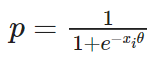

In [ ]:
def logistic(X, parameters):
    z = dot_product(X, parameters) #X와 파라미터 내적 수행
    p = 1/(1+np.exp(-z)) #로지스틱 수식에 z대입
    return p

In [ ]:
logistic(X_train.iloc[1], parameters) #로지스틱 계산

0.820065570732581

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

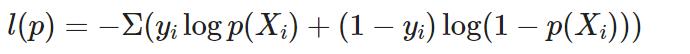

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters) #p계산
    loss = (y * np.log(p) + (1 - y) * np.log(1-p)) #위의 목적함수 수식대로 계산하기
    return -loss

In [ ]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T) #예측값 계산(X*파라미터의 전치함수)
    loss = ((y - y_hat)**2) / 2# 예측값과 실젯값을 활용한 MSE 계산
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1767008547830715

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

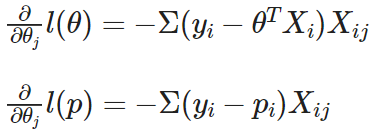

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return -gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.05172066921210632

In [ ]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[37.21479439828975, 15.465246301875736, 44.97660545396913]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 배치사이즈가 N이면 임의의 N개의 데이터만학습을 한다.
### 전체데이터 수/배치사이즈  크기의 데이터 세트가 만들어지고, 한번 학습할 때 배치사이즈만큼의 데이터로 학습이된다. 즉,한번학습할 때 사용되는 데이터 크기를 의미한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n #설정한 러닝레이트대로 그레디언트를 조정한다.
    parameters -= gradients #구해진 그레디언트값으로 파라미터를 업데이트한다.
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.1594933 , 0.7145821 , 0.47652585])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: 전체 데이터 셋에 대한 에러를 구한 뒤 기울기를 한번만 계산하여 모델의 parameter 를 업데이트 하는 방법
SGD: 학습 한번에 하나의 데이터 셋에 대한 에러를 구한 뒤 기울기를 한번만 계산하여 모델의 parameter 를 업데이트 하는 방법
MGD: 학습 한번에 일부의 데이터 셋에 대한 에러를 구한 뒤 기울기를 한번만 계산하여 모델의 parameter 를 업데이트 하는 방법
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    
    # train data의 파라미터 수 만큼 랜덤 파라미터 설정
    parameters = np.random.rand(N)
    
    # 로지스틱 회귀는 minus_log_cross_entropy_i를 사용하고, 선형이라면 mse_i를 사용한다.
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    
    # 초기의 Loss값을 큰 값으로 설정
    loss = 999
    
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch): #에폭수대로 학습
        if stopper:
            break
        # 한번 학습때 사용할 데이터 셋을 구한다.
        for idx in batch_idx_list:
            # 한번 학습때 사용하는 X와 y
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            # 현재 배치에 대해 그래디언트를 구한다.
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            # 구한 그래디언트를 바탕으로 파라미터 업데이트시키기
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            # 수정된 파라미터를 바탕으로 loss 다시 계산
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            if abs(new_loss - loss) < tolerance: #설정한 tolerance보다 loss가 작아지면, 학습을 중단한다.
                stopper = True
                break
            # 학습중단이 아니라면 손실 함수를 제일 작은 손실함수로 변경해준다.
            loss = new_loss
        
        if epoch%100 == 0: #백번 학습할때마다 상태를 출력한다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 1.0530571057629667  params: [0.66864405 0.70735349 0.71829928]  gradients: [0.03392574707903419, 0.011002652639603806, 0.031843230668465394]
epoch: 100  loss: 0.45681888957814454  params: [-0.79535015  0.86131813 -0.76416565]  gradients: [0.004326321294056589, -0.005981044772887339, 0.006817397162998029]
epoch: 200  loss: 0.3933398001033099  params: [-1.02946852  1.38792198 -1.30383968]  gradients: [0.0013697333277199505, -0.004508884931794812, 0.004429709850354447]
epoch: 300  loss: 0.3622970032423965  params: [-1.13741513  1.77795746 -1.6844184 ]  gradients: [0.0008980505789574224, -0.0033897312793988114, 0.0032910304636533487]
epoch: 400  loss: 0.3441313413457225  params: [-1.21750779  2.07822886 -1.9749831 ]  gradients: [0.000722967582550417, -0.0026720551292709845, 0.002577280261752499]
epoch: 500  loss: 0.3324792917872838  params: [-1.28379305  2.31924956 -2.2068272 ]  gradients: [0.0006096917417698879, -0.0021817005827449542, 0.0020930365000602627]
epoch: 600  lo

array([-1.50136913,  3.06807259, -2.91915316])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, 16) #그냥 16으로 해봤다,
new_param_sgd

epoch: 0  loss: 1.098043492094895  params: [-8.10968777  1.01537829 -9.38640104]  gradients: [3.9696140201561967, 6.202134245180141, 6.21971798679915]
epoch: 100  loss: 0.605861293231324  params: [ -7.70141041   4.62271866 -10.44309471]  gradients: [2.631932077068133, 4.548377925225251, 4.432785552195961]
epoch: 200  loss: 0.605861293231324  params: [ -7.70141041   4.62271866 -10.44309471]  gradients: [2.631932077068133, 4.548377925225251, 4.432785552195961]
epoch: 300  loss: 0.605861293231324  params: [ -7.70141041   4.62271866 -10.44309471]  gradients: [2.631932077068133, 4.548377925225251, 4.432785552195961]
epoch: 400  loss: 0.605861293231324  params: [ -7.70141041   4.62271866 -10.44309471]  gradients: [2.631932077068133, 4.548377925225251, 4.432785552195961]
epoch: 500  loss: 0.605861293231324  params: [ -7.70141041   4.62271866 -10.44309471]  gradients: [2.631932077068133, 4.548377925225251, 4.432785552195961]
epoch: 600  loss: 0.605861293231324  params: [ -7.70141041   4.622718

array([ -7.70141041,   4.62271866, -10.44309471])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train, 64)
new_param_mgd

c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


epoch: 0  loss: 3.3188587105348337  params: [-28.32171701   8.12007695 -32.20408528]  gradients: [9.5576465076532, 19.21219397901949, 19.559042694868534]
epoch: 100  loss: 5.741946838938911  params: [-37.5789214   -0.25767923 -37.56950977]  gradients: [21.18882860281886, 30.104966012824736, 26.916793442387778]
epoch: 200  loss: 5.741946838946355  params: [-37.5789214   -0.25767923 -37.56950977]  gradients: [21.18882860282043, 30.104966012826935, 26.916793442392127]
epoch: 300  loss: 5.741946838946355  params: [-37.5789214   -0.25767923 -37.56950977]  gradients: [21.18882860282043, 30.104966012826935, 26.916793442392127]
epoch: 400  loss: 5.741946838946355  params: [-37.5789214   -0.25767923 -37.56950977]  gradients: [21.18882860282043, 30.104966012826935, 26.916793442392127]
epoch: 500  loss: 5.741946838946355  params: [-37.5789214   -0.25767923 -37.56950977]  gradients: [21.18882860282043, 30.104966012826935, 26.916793442392127]
epoch: 600  loss: 5.741946838946355  params: [-37.578921

array([-37.5789214 ,  -0.25767923, -37.56950977])

### Predict Label

In [ ]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)# new_param_bgd를 활용한 에측
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters) #random_parameters를 활용한 예측
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict) #confusion matrix는 주로 f1score, recall등등 값을 구할때 사용된다(fp,tp,fn,tn)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.63144463, 2.57446828])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.4931309369162536  params: [1.08136547 1.05966605]  gradients: [-0.04172744721089453, -0.017902855636565986]
epoch: 100  loss: 0.49796781699622844  params: [0.7078048  2.47980508]  gradients: [-0.01971004019310149, 0.0013901211995447139]
epoch: 200  loss: 0.4981287158804268  params: [0.70706735 2.48118717]  gradients: [-0.019730902806139674, 0.0013919763965386633]
epoch: 300  loss: 0.4981288932167644  params: [0.70706654 2.4811887 ]  gradients: [-0.019730925787532428, 0.0013919784401470348]
epoch: 400  loss: 0.4981288934121111  params: [0.70706654 2.4811887 ]  gradients: [-0.019730925812847785, 0.0013919784423981913]
epoch: 500  loss: 0.49812889341232597  params: [0.70706654 2.4811887 ]  gradients: [-0.019730925812875638, 0.0013919784424006655]
epoch: 600  loss: 0.49812889341232597  params: [0.70706654 2.4811887 ]  gradients: [-0.019730925812875638, 0.0013919784424006655]
epoch: 700  loss: 0.49812889341232597  params: [0.70706654 2.4811887 ]  gradients: [-0.01973092581

array([0.70706654, 2.4811887 ])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

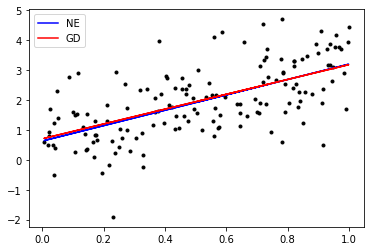

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

#두 방법 모두 비슷한 형태를 보여준다. 잘 예측한 것 같다.